## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
EARLYSTOP = {'val_loss':[5,10,25],
        'val_acc':[5,10,25]}

In [12]:
from keras.callbacks import EarlyStopping
ES = []
for i in EARLYSTOP:
    for j in EARLYSTOP[i]:
        ES.append(EarlyStopping(monitor=i, 
                          patience=j, 
                          verbose=1))

In [17]:
results = {}

for i in ES:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with ES %s" % str(i))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[i])

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "exp-%s" % str(i)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with ES <keras.callbacks.callbacks.EarlyStopping object at 0x000002ACC4D4FDA0>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
___________________________________

Epoch 6/50
50000/50000 [==============================] - 4906s 98ms/step - loss: 1.4530 - accuracy: 0.4912 - val_loss: 1.5930 - val_accuracy: 0.4423
Epoch 7/50
50000/50000 [==============================] - 27s 538us/step - loss: 1.4152 - accuracy: 0.5040 - val_loss: 1.5509 - val_accuracy: 0.4569
Epoch 8/50
50000/50000 [==============================] - 18s 366us/step - loss: 1.3780 - accuracy: 0.5182 - val_loss: 1.5295 - val_accuracy: 0.4627
Epoch 9/50
50000/50000 [==============================] - 16s 320us/step - loss: 1.3456 - accuracy: 0.5287 - val_loss: 1.5039 - val_accuracy: 0.4709
Epoch 10/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.3145 - accuracy: 0.5393 - val_loss: 1.4983 - val_accuracy: 0.4742
Epoch 11/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.2872 - accuracy: 0.5507 - val_loss: 1.5040 - val_accuracy: 0.4758
Epoch 12/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.2607 - accuracy: 0.

50000/50000 [==============================] - 12s 238us/step - loss: 1.0545 - accuracy: 0.6409 - val_loss: 1.4540 - val_accuracy: 0.4909
Epoch 21/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.0325 - accuracy: 0.6495 - val_loss: 1.4559 - val_accuracy: 0.4921
Epoch 22/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.0133 - accuracy: 0.6560 - val_loss: 1.4538 - val_accuracy: 0.4922
Epoch 23/50
50000/50000 [==============================] - 12s 233us/step - loss: 0.9899 - accuracy: 0.6670 - val_loss: 1.4608 - val_accuracy: 0.4976
Epoch 24/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.9715 - accuracy: 0.6725 - val_loss: 1.4645 - val_accuracy: 0.4949
Epoch 25/50
50000/50000 [==============================] - 11s 226us/step - loss: 0.9498 - accuracy: 0.6813 - val_loss: 1.4717 - val_accuracy: 0.4946
Epoch 26/50
50000/50000 [==============================] - 12s 246us/step - loss: 0.9276 - accuracy: 0.6909 - va

C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 12s 246us/step - loss: 1.7472 - accuracy: 0.3929 - val_loss: 1.9576 - val_accuracy: 0.3026
Epoch 3/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.6191 - accuracy: 0.4346 - val_loss: 1.8114 - val_accuracy: 0.3601
Epoch 4/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.5487 - accuracy: 0.4588 - val_loss: 1.7077 - val_accuracy: 0.3997
Epoch 5/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.4928 - accuracy: 0.4792 - val_loss: 1.6442 - val_accuracy: 0.4136
Epoch 6/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.4489 - accuracy: 0.4933 - val_loss: 1.5884 - val_accuracy: 0.4302
Epoch 7/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.4104 - accuracy: 0.5071 - val_loss: 1.5522 - val_accuracy: 0.4500
Epoch 8/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.3748 - accuracy: 0.5207 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 259us/step - loss: 2.1710 - accuracy: 0.2703 - val_loss: 2.1092 - val_accuracy: 0.2442
Epoch 2/50


C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 13s 251us/step - loss: 1.7398 - accuracy: 0.3908 - val_loss: 1.9764 - val_accuracy: 0.3054
Epoch 3/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.6133 - accuracy: 0.4345 - val_loss: 1.8487 - val_accuracy: 0.3472
Epoch 4/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.5429 - accuracy: 0.4600 - val_loss: 1.7395 - val_accuracy: 0.3908
Epoch 5/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.4880 - accuracy: 0.4787 - val_loss: 1.6640 - val_accuracy: 0.4132
Epoch 6/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.4433 - accuracy: 0.4967 - val_loss: 1.6110 - val_accuracy: 0.4359
Epoch 7/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.4038 - accuracy: 0.5091 - val_loss: 1.5721 - val_accuracy: 0.4449
Epoch 8/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.3699 - accuracy: 0.5224 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 258us/step - loss: 2.2654 - accuracy: 0.2599 - val_loss: 2.1900 - val_accuracy: 0.1778
Epoch 2/50


C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 12s 248us/step - loss: 1.7588 - accuracy: 0.3885 - val_loss: 2.0400 - val_accuracy: 0.2670
Epoch 3/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.6257 - accuracy: 0.4315 - val_loss: 1.8370 - val_accuracy: 0.3727
Epoch 4/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.5513 - accuracy: 0.4578 - val_loss: 1.7414 - val_accuracy: 0.3930
Epoch 5/50
50000/50000 [==============================] - 14s 288us/step - loss: 1.4939 - accuracy: 0.4787 - val_loss: 1.6427 - val_accuracy: 0.4306
Epoch 6/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.4491 - accuracy: 0.4941 - val_loss: 1.5857 - val_accuracy: 0.4466
Epoch 7/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.4114 - accuracy: 0.5086 - val_loss: 1.5479 - val_accuracy: 0.4548
Epoch 8/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.3748 - accuracy: 0.5199 - val_loss

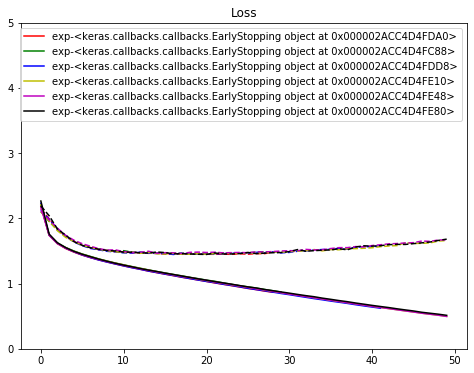

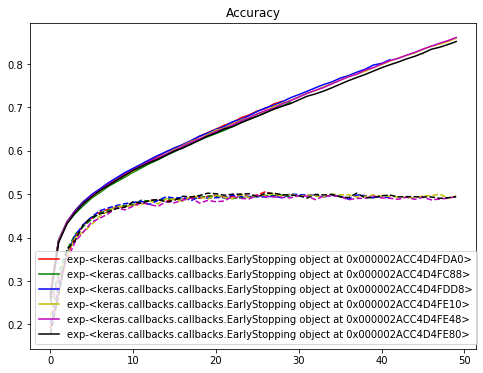

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()